In [44]:
# Juego del Calamar - probabilidad del juego de las canicas
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# creamos la función

def juego_canicas(canicas_jugador_1 = 10, canicas_jugador_2 = 10):
    canicas = dict({'jugador_1':canicas_jugador_1, 'jugador_2':canicas_jugador_2})
    mano = dict({'jugador_1':0,'jugador_2':0})
    turno = np.random.choice(['jugador_1','jugador_2'])
    jugamos = True

    while jugamos==True:
        # se define el jugador que no está en turno (el otro)
        otro = np.array_str(np.where(turno=='jugador_1','jugador_2','jugador_1'))

        # los jugadores escogen las canincas y las esconden
        mano['jugador_1'] = np.random.choice(np.arange(10)+1) 
        mano['jugador_2'] = np.random.choice(np.arange(10)+1)

        # el jugador apuesta PAR o IMPAR (par = 0 / impar = 1)
        apuesta = np.random.choice(np.arange(2)) # rango del 0-1

        # jugadores muestran los resultados
        if (mano[otro] % 2) == apuesta:
            #jugador de turno adivina
            canicas[turno]+=mano[turno]
            canicas[otro]-=mano[otro]
            if canicas[turno] >=20:
                return(turno)
        
        else:
            # jugador de turno falla
            canicas[turno]-=mano[otro]
            canicas[otro]+=mano[otro]
            if canicas[turno] <=0:
                return(otro)
        
        # Cambio de turno
        turno = np.array_str(np.where(turno == 'jugador_1','jugador_2','jugador_1'))


In [46]:
juego_canicas()

'jugador_1'

0.489


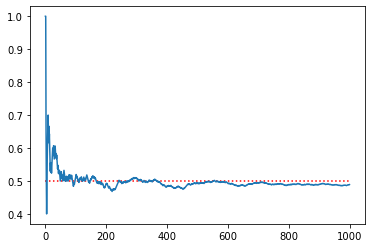

In [47]:
# numero inicial de canicas
canicasjugador_1 = 10
canicasjugador_2 = 10

#asignar variables
suma_ganados = 0
veces_ganados = []
n_juegos = 1000


#ciclo for para el calculo de simulaciones
for i in np.arange(n_juegos):
    resultado = juego_canicas(canicasjugador_1,canicasjugador_2)
    if resultado == 'jugador_1':
        suma_ganados+=1
    veces_ganados.append(suma_ganados/(i+1))


# imprimir probabilidad final estimada
print(veces_ganados[-1])

# Graficar probabilidades

plt.plot(np.arange(n_juegos),veces_ganados)
plt.hlines(y=0.5,xmin=0,xmax=n_juegos,colors='r',linestyles='dotted')
plt.show()